## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Indonesia dan Jakarta

In [2]:
df = pd.read_csv('./Data/Data.csv')

In [3]:
df.head()

Tanggal  Meninggal (Indonesia)  Sembuh (Indonesia)  Dirawat (Indonesia)  \
0  03/01/2020                      0                   0                    0   
1  03/02/2020                      0                   0                    2   
2  03/03/2020                      0                   0                    2   
3  03/04/2020                      0                   0                    2   
4  03/05/2020                      0                   0                    2   

   Positif (Indonesia)  Meninggal (Jakarta)  Sembuh (Jakarta)  \
0                    0                    0                 0   
1                    2                    0                 0   
2                    2                    1                 0   
3                    2                    1                 0   
4                    2                    3                 0   

   Self-Isolation (Jakarta)  Dirawat (Jakarta)  Positif (Jakarta)  ...  \
0                         0                  0                  0  ...   
1                         0                  0                  0  ...   
2                         0                  2                  3  ...   
3                         0                  2                  3  ...   
4                         0                  4                  7  ...   

   Meninggal Harian (Indonesia)  Sembuh Harian (Indonesia)  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Dirawat Harian (Indonesia)  Positif Harian (Indonesia)  \
0                           0                           0   
1                           2                           2   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Meninggal Harian (Jakarta)  Sembuh Harian (Jakarta)  \
0                           0                        0   
1                           0                        0   
2                           1                        0   
3                           0                        0   
4                           2                        0   

   Self-Isolation Harian (Jakarta)  Dirawat Harian (Jakarta)  \
0                                0                         0   
1                                0                         0   
2                                0                         2   
3                                0                         0   
4                                0                         2   

   Positif Harian (Jakarta)  Positif Aktif Harian (Jakarta)  
0                         0                               0  
1                         0                               0  
2                         3                               2  
3                         0                               0  
4                         4                               2  

[5 rows x 21 columns]

#### Data augmentation

In [4]:
# Extracting month and year from 'Tanggal' column
df['month_year'] = pd.to_datetime(df['Tanggal']).dt.to_period('M')

In [5]:
# Sum up the data to gather information about covid-19 cases each month
d2 = df.groupby('month_year').sum()
d2.reset_index(level=0, inplace=True)

In [6]:
# Renaming the columns
d2.rename(columns={'Meninggal Harian (Indonesia)': 'Meninggal Bulanan (Indonesia)', 
                   'Sembuh Harian (Indonesia)': 'Sembuh Bulanan (Indonesia)', 
                   'Dirawat Harian (Indonesia)': 'Dirawat Bulanan (Indonesia)', 
                   'Positif Harian (Indonesia)': 'Positif Bulanan (Indonesia)'}, inplace=True)
d2.rename(columns={'Meninggal Harian (Jakarta)': 'Meninggal Bulanan (Jakarta)', 
                   'Sembuh Harian (Jakarta)': 'Sembuh Bulanan (Jakarta)', 
                   'Dirawat Harian (Jakarta)': 'Dirawat Bulanan (Jakarta)', 
                   'Positif Harian (Jakarta)': 'Positif Bulanan (Jakarta)',
                  'Self-Isolation Harian (Jakarta)': 'Self-Isolation Bulanan (Jakarta)'}, inplace=True)

In [7]:
d2.head()

month_year  Meninggal (Indonesia)  Sembuh (Indonesia)  Dirawat (Indonesia)  \
0    2020-03                    989                 584                10396   
1    2020-04                  14067               18115               132787   
2    2020-05                  35759              124915               385501   
3    2020-06                  66560              461691               683606   
4    2020-07                 122962             1325068              1096102   

   Positif (Indonesia)  Meninggal (Jakarta)  Sembuh (Jakarta)  \
0                11969                  688               397   
1               164969                 7120              5838   
2               546175                14520             38336   
3              1211857                17430            126899   
4              2544132                22483            307355   

   Self-Isolation (Jakarta)  Dirawat (Jakarta)  Positif (Jakarta)  ...  \
0                      1485               4367               6937  ...   
1                     19361              43173              75492  ...   
2                     61934              63096             177886  ...   
3                     87482              42488             274299  ...   
4                    127656              30697             488191  ...   

   Meninggal Bulanan (Indonesia)  Sembuh Bulanan (Indonesia)  \
0                            136                          81   
1                            656                        1441   
2                            821                        5786   
3                           1263                       17498   
4                           2255                       41101   

   Dirawat Bulanan (Indonesia)  Positif Bulanan (Indonesia)  \
0                         1311                         1528   
1                         6493                         8590   
2                         9748                        16355   
3                        11151                        29912   
4                         8635                        51991   

   Meninggal Bulanan (Jakarta)  Sembuh Bulanan (Jakarta)  \
0                           84                        49   
1                          297                       363   
2                          139                      1690   
3                          121                      4410   
4                          195                      6696   

   Self-Isolation Bulanan (Jakarta)  Dirawat Bulanan (Jakarta)  \
0                               157                        451   
1                              1115                       1622   
2                              1555                       -250   
3                               345                       -872   
4                              1802                       1232   

   Positif Bulanan (Jakarta)  Positif Aktif Harian (Jakarta)  
0                        741                             608  
1                       3397                            2737  
2                       3134                            1305  
3                       4004                            -527  
4                       9925                            3034  

[5 rows x 21 columns]

In [8]:
dupdata = d2.drop(['Meninggal (Indonesia)', 'Sembuh (Indonesia)', 'Dirawat (Indonesia)', 'Positif (Indonesia)', 
                  'Meninggal (Jakarta)', 'Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)', 
                   'Positif (Jakarta)', 'Positif Aktif (Jakarta)'], axis = 1)

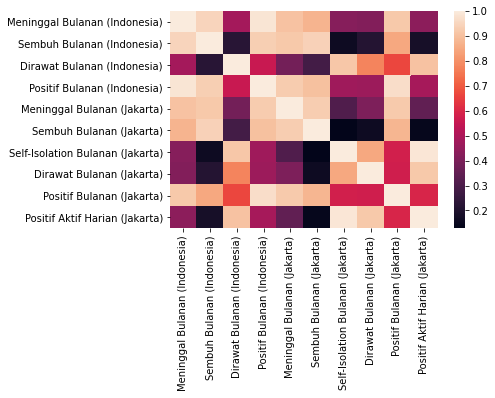

In [9]:
sns.heatmap(dupdata.corr());

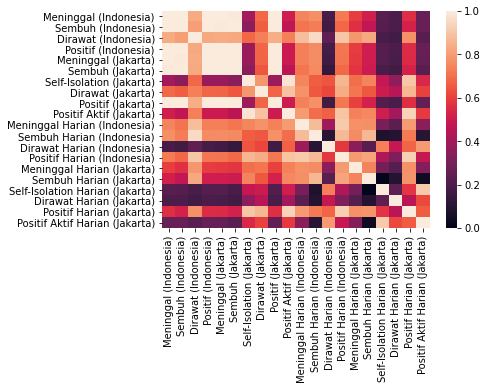

In [10]:
sns.heatmap(df.corr());

### Data visualization (Data Indonesia dan Jakarta)

<AxesSubplot:title={'center':'Monthly Positive cases in Indonesia'}, xlabel='Month', ylabel='# of cases'>

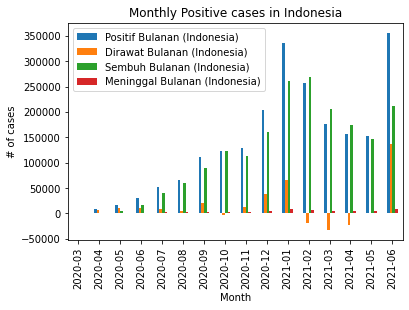

In [11]:
d2.plot(x="month_year", 
        y=["Positif Bulanan (Indonesia)", "Dirawat Bulanan (Indonesia)", "Sembuh Bulanan (Indonesia)", "Meninggal Bulanan (Indonesia)"], 
        kind="bar", 
        title="Monthly Positive cases in Indonesia", xlabel="Month", ylabel="# of cases")

<AxesSubplot:title={'center':'Monthly Positive cases in Jakarta'}, xlabel='Month', ylabel='# of cases in Jakarta'>

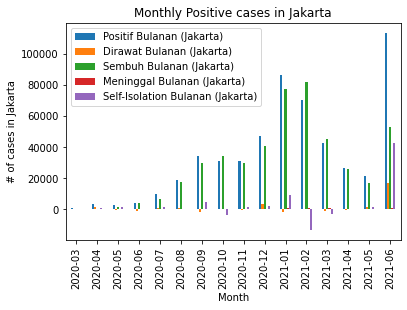

In [12]:
d2.plot(x="month_year", y=["Positif Bulanan (Jakarta)", "Dirawat Bulanan (Jakarta)", "Sembuh Bulanan (Jakarta)", "Meninggal Bulanan (Jakarta)", "Self-Isolation Bulanan (Jakarta)"], 
        kind="bar", title="Monthly Positive cases in Jakarta", xlabel="Month", ylabel="# of cases in Jakarta")

## Data Hasil Lab

In [13]:
df2 = pd.read_csv('./Data/Hasil Lab.csv')

In [14]:
df2.head()

Tanggal  Jumlah Orang di Test  Orang Positif Harian  \
0  2/29/2020                  40.0                   0.0   
1   3/1/2020                  39.0                   0.0   
2   3/2/2020                   3.0                   0.0   
3   3/3/2020                  15.0                   3.0   
4   3/4/2020                   7.0                   0.0   

   Orang Negatif Harian Positivity Rate Kasus Baru Harian  \
0                  40.0                              0.0%   
1                  39.0                              0.0%   
2                   3.0                              0.0%   
3                  12.0                             20.0%   
4                   7.0                              0.0%   

   Total Spesimen di Test  Positif  Negatif Positivity Rate Spesimen Harian  
0                      40        0       40                            0,0%  
1                      39        0       39                            0,0%  
2                       3        0        3                            0,0%  
3                      15        3       12                           20,0%  
4                       7        0        7                            0,0%

#### Data augmentation

In [15]:
# Extract month and year
df2['month_year'] = pd.to_datetime(df2['Tanggal']).dt.to_period('M')

# Grouping the data according to the month and year
d3 = df2.groupby('month_year').sum()
d3.reset_index(level=0, inplace=True)

# Renaming the columns
d3.rename(columns={'Orang Positif Harian': 'Orang Positif Bulanan', 'Orang Negatif Harian': 'Orang Negatif Bulanan'}, inplace=True)

### Data visualization

<AxesSubplot:title={'center':'Rates of positive cases'}, xlabel='Month', ylabel='# of tested people'>

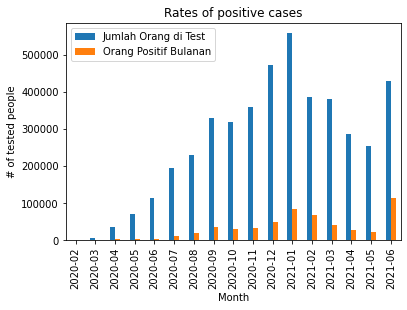

In [16]:
d3.plot(x="month_year", y=["Jumlah Orang di Test", "Orang Positif Bulanan"], kind="bar", xlabel="Month", ylabel="# of tested people", title="Rates of positive cases")

## Data Suspect Jakarta

In [17]:
df3 = pd.read_csv('./Data/Data SuS (Jakarta).csv')

In [19]:
df3 = df3.fillna(0)

In [20]:
df3.head()

Tanggal  Total Discarded  Isolasi di RS (Discarded)  \
0  7/17/2020             5712                        0.0   
1  7/18/2020             5713                        0.0   
2  7/19/2020             5713                        0.0   
3  7/20/2020             5713                        0.0   
4  7/21/2020             5643                        0.0   

   Isolasi di Rumah (Discarded)  Meninggal (Discarded)  \
0                           0.0                    0.0   
1                           0.0                    0.0   
2                           0.0                    0.0   
3                           0.0                    0.0   
4                           0.0                    0.0   

   Selesai Isolasi (Discarded)  Total Kontak Erat  \
0                         5712              78725   
1                         5713              80382   
2                         5713              81327   
3                         5713              81739   
4                         5643              82860   

   Isolasi di RS (Kontak Erat)  Isolasi di Rumah (Kontak Erat)  \
0                          0.0                            5191   
1                          0.0                            6531   
2                          0.0                            7372   
3                          0.0                            5547   
4                          0.0                            5934   

   Meninggal (Kontak Erat)  ...  Isolasi di RS (Probable)  \
0                      0.0  ...                       1.0   
1                      0.0  ...                       0.0   
2                      0.0  ...                       0.0   
3                      0.0  ...                       0.0   
4                      0.0  ...                       0.0   

   Isolasi di Rumah (Probable)  Meninggal (Probable)  \
0                          0.0                     4   
1                          0.0                     4   
2                          0.0                     4   
3                          0.0                     4   
4                          0.0                     4   

   Selesai Isolasi (Probable)  Total Suspek  Isolasi di RS (Suspek)  \
0                          37         51507                     981   
1                          38         52081                     780   
2                          38         52586                    1136   
3                          38         52714                    1067   
4                          38         52957                    1158   

   Isolasi di Rumah (Suspek)  Meninggal (Suspek)  Selesai Isolasi (Suspek)  \
0                        504                2194                     47828   
1                        584                2194                     48523   
2                        610                2194                     48646   
3                        602                2194                     48851   
4                        725                2194                     48880   

   GRAND TOTAL  
0     137780.0  
1     140021.0  
2     141471.0  
3     142017.0  
4     143326.0  

[5 rows x 27 columns]

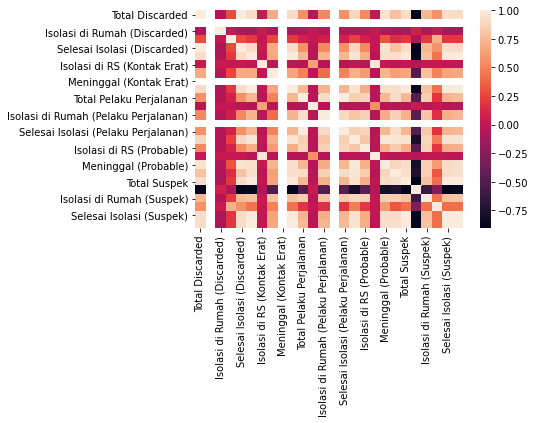

In [21]:
sns.heatmap(df3.corr());

In [26]:
# Extract month and year
df3['month_year'] = pd.to_datetime(df3['Tanggal']).dt.to_period('M')

# Grouping the data according to the month and year
d4 = df3.groupby('month_year').mean()
d4.reset_index(level=0, inplace=True)

In [27]:
d4.head(20)

month_year  Total Discarded  Isolasi di RS (Discarded)  \
0     2020-07      5717.733333                        0.0   
1     2020-08      6111.645161                        0.0   
2     2020-09      7479.033333                        0.0   
3     2020-10      9161.806452                        0.0   
4     2020-11     11859.266667                        0.0   
5     2020-12     14154.258065                        0.0   
6     2021-01     16125.548387                        0.0   
7     2021-02     17280.571429                        0.0   
8     2021-03     17507.193548                        0.0   
9     2021-04     17549.933333                        0.0   
10    2021-05     18595.677419                        0.0   
11    2021-06     19783.000000                        0.0   

    Isolasi di Rumah (Discarded)  Meninggal (Discarded)  \
0                       0.000000                    0.4   
1                       0.000000                    1.0   
2                       0.000000                    1.0   
3                       5.806452                    1.0   
4                       1.000000                    1.0   
5                       0.000000                    1.0   
6                       0.193548                    1.0   
7                       0.000000                    1.0   
8                       0.000000                    1.0   
9                       0.000000                    1.0   
10                      0.000000                    1.0   
11                      0.000000                    1.0   

    Selesai Isolasi (Discarded)  Total Kontak Erat  \
0                   5717.333333       8.756287e+04   
1                   6110.645161       1.156407e+05   
2                   7478.033333       1.697800e+05   
3                   9155.000000       2.616495e+05   
4                  11857.266667       3.743081e+05   
5                  14153.258065       5.130660e+05   
6                  16124.354839       6.241615e+05   
7                  17279.571429       7.947748e+05   
8                  17506.193548       9.931688e+05   
9                  17548.933333       1.194023e+06   
10                 18594.677419       1.320339e+06   
11                 19782.000000       1.481320e+06   

    Isolasi di RS (Kontak Erat)  Isolasi di Rumah (Kontak Erat)  \
0                      0.000000                     8356.400000   
1                      0.000000                    11284.774194   
2                      0.000000                    18510.133333   
3                      0.000000                    25944.483871   
4                      0.000000                    28894.300000   
5                      0.000000                    34955.870968   
6                      0.096774                    23712.935484   
7                      0.000000                    34234.928571   
8                      0.000000                    37508.516129   
9                      0.000000                    39836.633333   
10                     0.000000                    27441.677419   
11                     0.000000                    53315.066667   

    Meninggal (Kontak Erat)  ...  Isolasi di RS (Probable)  \
0                       0.0  ...                  0.066667   
1                       0.0  ...                 11.548387   
2                       0.0  ...                 36.500000   
3                       0.0  ...                 31.580645   
4                       0.0  ...                 43.766667   
5                       0.0  ...                 39.354839   
6                       0.0  ...                 52.935484   
7                       0.0  ...                 90.892857   
8                       0.0  ...                 58.709677   
9                       0.0  ...                179.100000   
10                      0.0  ...                462.967742   
11                      0.0  ...                821.000000   

    Isolasi di Rumah (Probable)  Meninggal (Probable)  \
0 

<AxesSubplot:title={'center':'Data suspects'}, xlabel='Month', ylabel='Average number of suspect'>

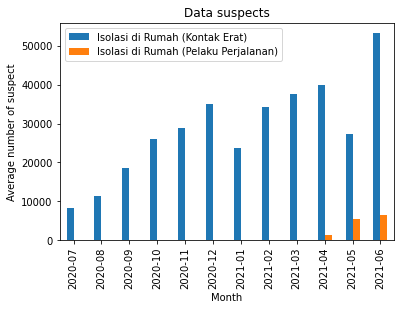

In [28]:
d4.plot(x="month_year", y=["Isolasi di Rumah (Kontak Erat)", "Isolasi di Rumah (Pelaku Perjalanan)"], 
        kind="bar", xlabel="Month", ylabel="Average number of suspect", title="Data suspects")